In [7]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm


# Aproximación normal de momentos

$$\frac{\theta|y - \text{E}(\theta|y)}{\sqrt{\text{var}(\theta|y)}}\sim N(0,1)$$

## Ej Dados 1

P-5: 147
P-25: 159
P-50: 167
P-75: 175
P-95: 186


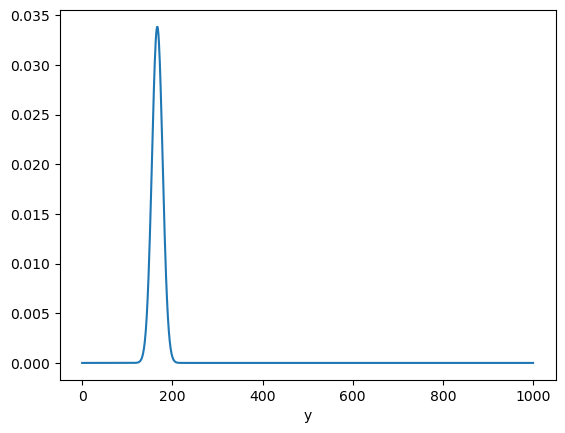

In [11]:
n=1000
p=1/6

x=np.linspace(0,1000,1000)

plt.plot(x,norm.pdf(x,loc = n*p,scale=np.sqrt(n*p*(1-p))))
plt.xlabel('y')

#No se olviden de redondear! y es discreto
print('P-5:',round(norm.ppf(0.05,loc = n*p,scale=np.sqrt(n*p*(1-p)))))
print('P-25:',round(norm.ppf(0.25,loc = n*p,scale=np.sqrt(n*p*(1-p)))))
print('P-50:',round(norm.ppf(0.50,loc = n*p,scale=np.sqrt(n*p*(1-p)))))
print('P-75:',round(norm.ppf(0.75,loc = n*p,scale=np.sqrt(n*p*(1-p)))))
print('P-95:',round(norm.ppf(0.95,loc = n*p,scale=np.sqrt(n*p*(1-p)))))
plt.show()

## Ej Dados 2

(0.0, 350.0)

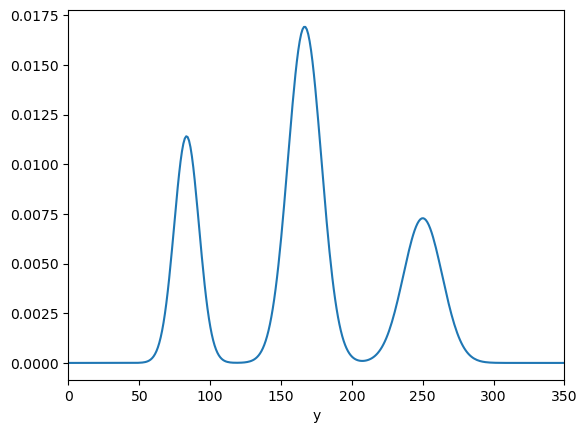

In [12]:
prior_12 = 0.25
prior_6 = 0.5
prior_4 = 0.25

p=1/12
L_12 = norm.pdf(x, loc = n*p,scale=np.sqrt(n*p*(1-p)))
p=1/6
L_6 = norm.pdf(x,loc = n*p,scale=np.sqrt(n*p*(1-p)))
p=1/4
L_4 = norm.pdf(x,loc = n*p,scale=np.sqrt(n*p*(1-p)))

p_y = L_12*prior_12 + L_6*prior_6 + L_4*prior_4


plt.plot(x,p_y)
plt.xlabel('y')
plt.xlim(0,350)

In [4]:
print('P-5:',round(norm.ppf(0.20,loc = n/12,scale=np.sqrt(n*11/12/12))))
print('P-25:',120,'(a vista)')
print('P-50:',round(norm.ppf(0.50,loc = n/6,scale=np.sqrt(n*5/6/6))))
print('P-75:',205,'(a vista)')
print('P-95:',round(norm.ppf(0.80,loc = n/4,scale=np.sqrt(n*3/4/4))))

P-5: 76
P-25: 120 (a vista)
P-50: 167
P-75: 205 (a vista)
P-95: 262


# Aproximación cuadrática

## Ej Cauchy

In [13]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import uniform

y = np.array([-2, -1, 0, 1.5, 2.5,1,2,3,0.5,-2,-0.24,0.75,1,0,-2.71,0.7,2.99,-3,-2, -1, 0, 1.5, 2.5,1,2,3,0.5,-2,-0.24,0.75,1,0,-2.71,0.7,2.99,-3])

def neg_log_posterior(theta, y):
    if theta < -3 or theta > 3:
        return np.inf
    log_posterior = -np.sum(np.log(1 + (y - theta)**2))+np.log(6)
    return -log_posterior

def log_posterior_prime(theta, y):
    if theta < -3 or theta > 3:
        return np.inf
    return 2*np.sum((y - theta) / (1 + (y - theta)**2))

def log_posterior_prime2(theta, y):
    if theta < -3 or theta > 3:
        return np.inf
    return -2 * np.sum((1 - (y - theta)**2) / (1 + (y - theta)**2)**2)

initial_theta = 0.5
res = minimize(neg_log_posterior, initial_theta, args=(y,))
posterior_mode = res.x[0]


I = -log_posterior_prime2(posterior_mode,y)
std_approx = np.sqrt(1/I)

print(f"La moda posterior de θ es aproximadamente: {posterior_mode:.4f}")
print(f"El desvío estándar aproximado es: {std_approx:.4f}")


La moda posterior de θ es aproximadamente: 0.5756
El desvío estándar aproximado es: 0.2482


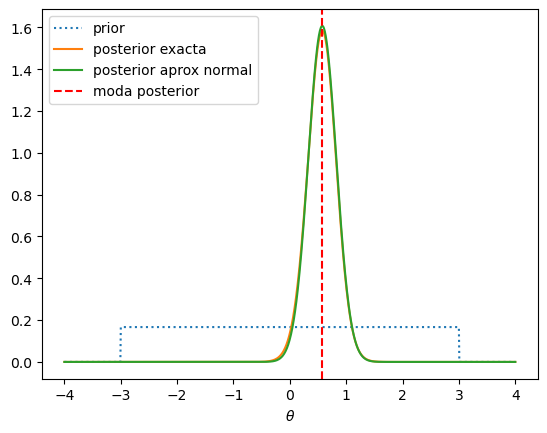

In [14]:
x=np.linspace(-4, 4, 1000)

normal_density = norm.pdf(x, loc=posterior_mode, scale=std_approx)

def posterior(theta, y):
    if theta < -3 or theta > 3:
        return 0
    log_likelihood = -np.sum(np.log(1 + (y - theta)**2))
    return np.exp(log_likelihood)

exact_posterior = np.array([posterior(theta, y) for theta in x])
exact_posterior /= np.trapz(exact_posterior, x)


prior = uniform.pdf(x,-3,6)

plt.plot(x, prior, label='prior', linestyle='dotted')
plt.plot(x, exact_posterior, label='posterior exacta')
plt.plot(x, normal_density, label='posterior aprox normal')
plt.axvline(posterior_mode, color='r', linestyle='--', label='moda posterior')
plt.xlabel(r'$\theta$')
plt.legend()
plt.show()
